## **Evidencia 3: Evaluación y Refinamiento de modelo**

En este proyecto, se propone crear un modelo de clasificación utilizando el algoritmo Random Forest. Para llevar a cabo este proceso, optamos por utilizar Python como lenguaje de programación y el framework de sklearn, ya que es conocido por su facilidad de uso y una amplia gama de bibliotecas disponibles para la manipulación y análisis de datos.

Se utilizara el dataset de **Titanic** donde, **se predice si una persona sobrevivió o no al desastre del Titanic**. Para conocer más sobre este proyecto se puede consultar el siguiente link: https://www.kaggle.com/competitions/titanic

El proceso estara documentado con comentarios en el código, y mostrara paso a paso el desarrollo del modelo con el uso del framework.

Los archivos que estaremos utilizando del ETL son **train_etl y test_etl**.

Ambos archivos se encuentran aqui:

https://drive.google.com/file/d/1T_ZRV0zAYqC3d1am8xCXJ6CqDRyptBw0/view?usp=sharing

https://drive.google.com/file/d/1gJDScqXANL15oZilDhXhkL_fxIa-Jrjh/view?usp=sharing



### Configuración Inicial del Modelo

1. criterion = "gini"
2. n_estimators = 100
3. max_depth = 5

**Parametros**

criterion: Opción que permite especificar la medida de calidad que se utiliza para tomar decisiones sobre la división de nodos durante la construcción de los árboles en el bosque aleatorio

min_impurity_decrease: Este hiper parámetro controla la cantidad mínima de reducción requerida en la impureza (criterio de división) para que se produzca una división en un nodo del árbol. Se configura min_impurity_decrease en 0.02, lo que significa que se requerirá una reducción relativamente grande en la impureza para dividir un nodo. Este valor ayuda a limitar la profundidad del árbol y prevenir divisiones que no proporcionen una mejora significativa en la calidad de las divisiones.

max_depth: Limitamos la profundidad máxima de cada árbol a 5. Esto significa que ningún árbol en el bosque tendrá más de 5 niveles de profundidad. Limitar la profundidad de los árboles puede ayudar a controlar la complejidad del modelo y evitar un sobreajuste excesivo a los datos de entrenamiento.

min_samples_split: Configuramos min_samples_split en 10, lo que significa que se requerirán al menos 10 muestras en un nodo para que se realice una división. Esto puede ayudar a prevenir divisiones en nodos con un número muy bajo de muestras, lo que nuevamente contribuye a evitar un sobreajuste.

n_estimators: Configuramos n_estimators en 100, lo que indica que estamos construyendo un bosque de 100 árboles de decisión. Tener un número moderado de árboles en el bosque puede ser eficiente en términos computacionales y suele ser suficiente para obtener un buen rendimiento.

### Cargar datos

In [ ]:
# Cambiar ruteo con de acuerdo a la ubicacion los archivos en su dispositivo
train_df = pd.read_csv('/content/drive/MyDrive/TC3006C.101_OpenAIGPT/Reto/Solucion/train_etl.csv')
test_df = pd.read_csv('/content/drive/MyDrive/TC3006C.101_OpenAIGPT/Reto/Solucion/test_etl.csv')

#Descripcion de datos
cantidad_registros = len(train_df)
numero_caracteristicas = len(train_df.columns) - 1
valores_salida = train_df["Survived"].unique()
print("Descripcion de Diabetes Dataset")
print(f"Cantidad de registros: {cantidad_registros}")
print(f"Número de características: {numero_caracteristicas}")
print(f"Valores de salida: {valores_salida}")
train_df

Descripcion de Diabetes Dataset
Cantidad de registros: 891
Número de características: 7
Valores de salida: [0 1]


,Pclass,Age,Sex,IsAlone,Fare,Embarked,Title,Survived
0,3,2,1,0,1,2,1,0
1,1,4,0,0,5,1,2,1
2,3,2,0,1,2,2,3,1
3,1,4,0,0,5,2,2,1
4,3,4,1,1,2,2,1,0
...,...,...,...,...,...,...,...,...
886,2,3,1,1,3,2,5,0
887,1,1,0,1,4,2,3,1
888,3,2,0,0,4,2,3,0
889,1,2,1,1,4,1,1,1


### Separación de datos en subconjuntos

Para entrenar al modelo se dividen los datos en los subconjuntos de entrenamiento, vaidación y prueba en una proporción de sesenta, veinte y veinte respectivamente. Para realizar este división se utiliza la función **train_test_split**, la cual selecciona las muestras para cada subconjunto aleatoriamente.

Además, con el propósito de evitar un sesgo en el modelo se **escalan** los datos de los subconjuntos de entrenamiento, validación y prueba. Para esto se utiliza el módulo de **preprocesamiento de sklearn**.

In [ ]:
# Separar la columna 'Survived' para el conjunto de entrenamiento
n = len(train_df.columns) - 1
X = train_df.iloc[:, 0:n]
y = train_df.iloc[:, n]

# Dividir el dataset en conjuntos de entrenamiento (60%) y validación (40%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)


### Entrenamiento del modelo

#### Modelo hipótesis

Para analizar más a fondo el modelo hipótesis se grafica el error de las predicciones realizadas por el modelo contra el tamaño del subconjunto de entrenamiento.

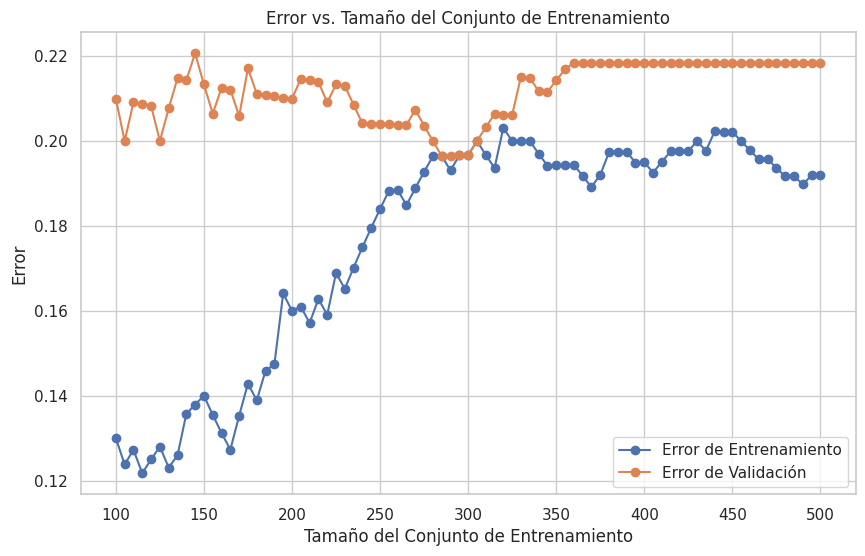

In [ ]:
def error_modelo(modelo):
  # Inicializa listas de errores para subconjuntos
  train_errors = []
  val_errors = []

  # Tamanos de subconjunto
  training_sizes = range(100, 501, 5)

  for size in training_sizes:
      # Selecciona un subconjunto de entrenamiento del tamano actual
      X_train_subset = X_train[:size]
      y_train_subset = y_train[:size]
      X_val_subset = X_val[:size]
      y_val_subset = y_val[:size]

      # Realiza predicciones en los conjuntos de entrenamiento y validacion
      y_train_pred = modelo.predict(X_train_subset)
      y_val_pred = modelo.predict(X_val_subset)

      # Calcula los errores de entrenamiento y validacion
      train_error = 1 - accuracy_score(y_train_subset, y_train_pred)
      val_error = 1 - accuracy_score(y_val_subset, y_val_pred)

      # Agrega los errores a las listas
      train_errors.append(train_error)
      val_errors.append(val_error)

  plt.figure(figsize=(10, 6))
  plt.plot(training_sizes, train_errors, label='Error de Entrenamiento', marker='o')
  plt.plot(training_sizes, val_errors, label='Error de Validación', marker='o')
  plt.title('Error vs. Tamaño del Conjunto de Entrenamiento')
  plt.xlabel('Tamaño del Conjunto de Entrenamiento')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.show()

# Modelo hipotesis
tree = RandomForestClassifier(criterion="gini", n_estimators=100, max_depth=3)
tree.fit(X_train, y_train)
error_modelo(tree)

**Observaciones:**
- Los errores de ambos subconjuntos estan muy separados, esto es señal de que hay un sobreajuste del modelo (overffiting). Por lo tanto, se tiene una **varianza media** y un **sesgo bajo**.
- El error del modelo incrementa a medida que el subconjunto de entrenamiento crece, indicador de que el modelo no es el ideal.

Por lo tanto, el modelo hipótesis no es el indicado porque padece de overfitting. Hay muy poco error en subset de entrenamiento y no generaliza bien.

#### Ajuste de parámetro max_depth

Considerando estas observaciones se toma la decisión de ajustar el parámetro **max_depth** para reducir el overfitting del modelo anterior. A continuación, se busca el la valor de **max_depth** ideal para reducir el error de validación y entrenamiento.

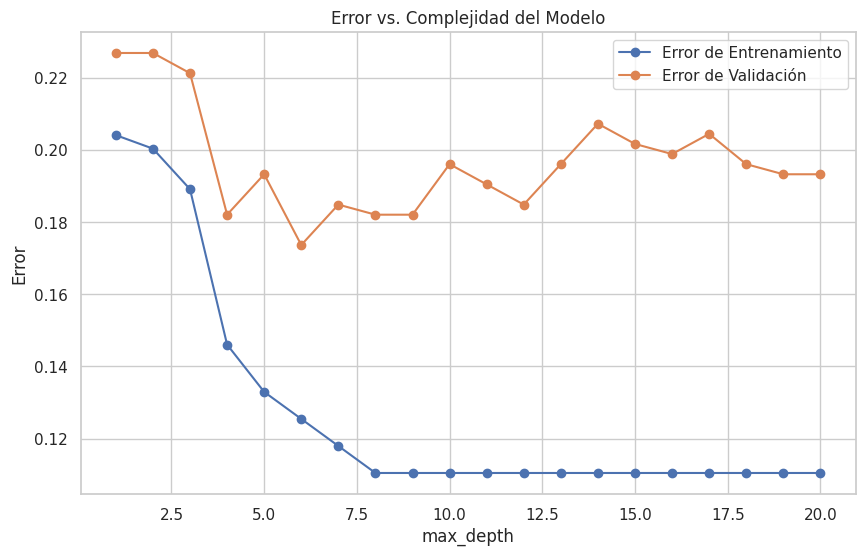

In [ ]:
# Define una lista de valores de max_depth que se desea probar
max_depth_values = range(1, 21, 1)

# Inicializa listas para almacenar los errores de entrenamiento y validacion
train_errors = []
val_errors = []

# Itera a traves de los valores de max_depth
for max_depth in max_depth_values :
    # Crea y entrena un modelo de arbol con la max_depth actual
    tree = RandomForestClassifier(criterion="gini", n_estimators=100, max_depth=max_depth)
    tree.fit(X_train, y_train)

    # Realiza predicciones en los conjuntos de entrenamiento y validacion
    y_train_pred = tree.predict(X_train)
    y_val_pred = tree.predict(X_val)

    # Calcula el error de entrenamiento y validacion
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    val_error = 1 - accuracy_score(y_val, y_val_pred)

    # Agrega los errores a las listas
    train_errors.append(train_error)
    val_errors.append(val_error)

# Crea la grafica de error vs. complejidad del modelo
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, label='Error de Entrenamiento', marker='o')
plt.plot(max_depth_values, val_errors, label='Error de Validación', marker='o')
plt.title('Error vs. Complejidad del Modelo')
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

**Observación:** El mejor valor de max_depth parece ser de cinco, hay una reducción significativa en los subconjuntos de validación y entrenamiento.

Ajustando el parámetro max_depth a cinco, se revisa si hay una reducción de overffiting del modelo.

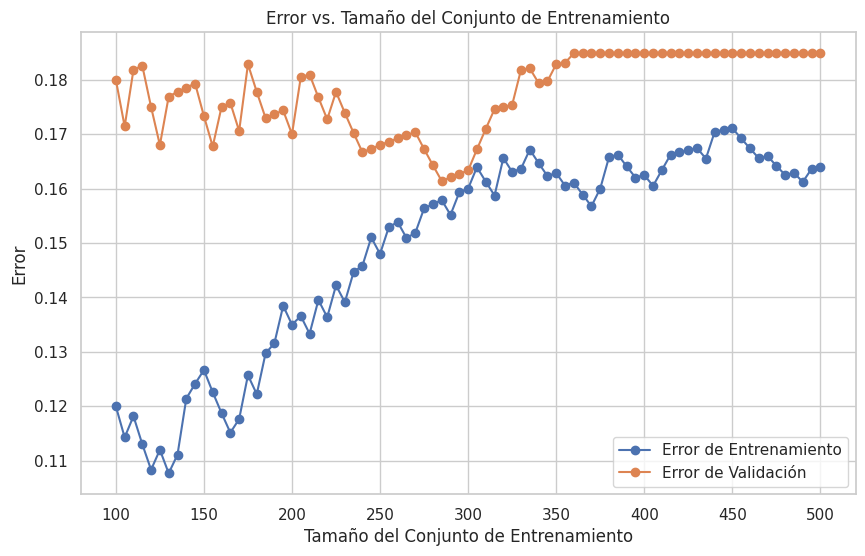

In [ ]:
# Modelo con ajuste de max_depth
tree = RandomForestClassifier(criterion="gini", n_estimators=100, max_depth=4)
tree.fit(X_train, y_train)
error_modelo(tree)

**Observaciones:**
- Hay una reducción de la diferencia de error entre ambos subconjuntos. Por lo tanto, el ajuste del modelo disminuyó en cuanto a sobreajuste (overffiting). Ahora hay una **varianza** más **baja** y un **sesgo bajo**.
- El error del subconjunto de entrenamiento es muy volátil.

#### Ajuste de parámetro n_estimators

Considerando estas observaciones se toma la decisión de ajustar el parámetro **n_estimators** para reducir el overfitting del modelo anterior. A continuación, se busca el la valor de **n_estimators** cantidad de arboles ideal para reducir el error de validación y entrenamiento.

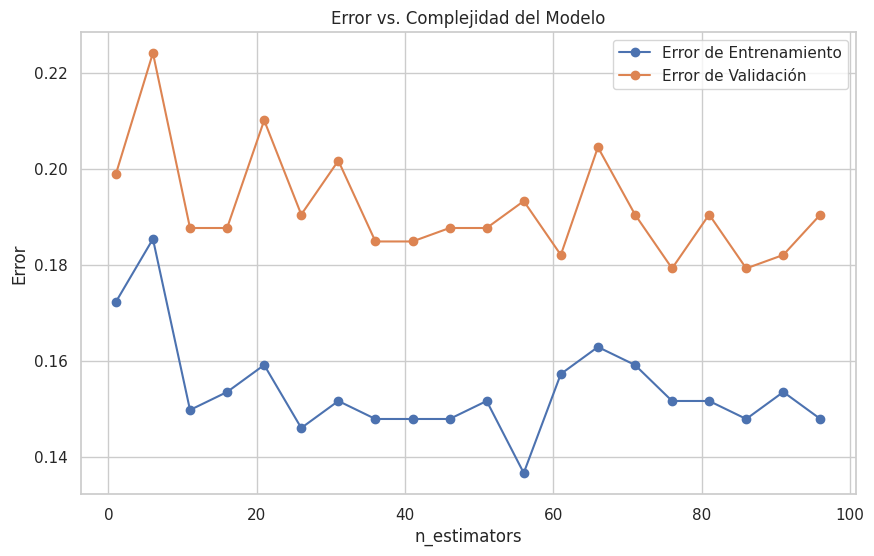

In [ ]:
# Define una lista de valores de n_estimators que se desea probar
n_estimators_values = range(1, 100, 5)

# Inicializa listas para almacenar los errores de entrenamiento y validación
train_errors = []
val_errors = []

# Itera a través de los valores de n_estimators
for n_estimators in n_estimators_values:
    # Crea y entrena un modelo de Random Forest con el n_estimators actual
    modeloRandomForest = RandomForestClassifier(criterion="gini", n_estimators=n_estimators, max_depth=4)
    modeloRandomForest.fit(X_train, y_train)

    # Realiza predicciones en los conjuntos de entrenamiento y validación
    y_train_pred = modeloRandomForest.predict(X_train)
    y_val_pred = modeloRandomForest.predict(X_val)

    # Calcula el error de entrenamiento y validación
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    val_error = 1 - accuracy_score(y_val, y_val_pred)

    # Agrega los errores a las listas
    train_errors.append(train_error)
    val_errors.append(val_error)

# Crea la gráfica de error vs. complejidad del modelo
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_errors, label='Error de Entrenamiento', marker='o')
plt.plot(n_estimators_values, val_errors, label='Error de Validación', marker='o')
plt.title('Error vs. Complejidad del Modelo')
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

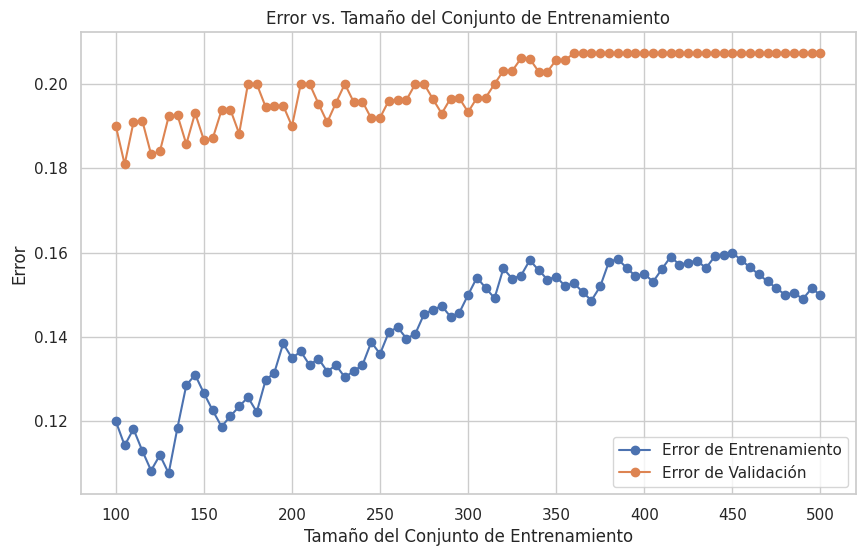

In [ ]:
# Modelo con ajuste de max_depth
tree = RandomForestClassifier(criterion="gini", n_estimators=21, max_depth=5)
tree.fit(X_train, y_train)
error_modelo(tree)

#### Ajuste de parámetro min_samples_split

Considerando estas observaciones se toma la decisión de ajustar el parámetro **min_samples_split** para reducir el overfitting del modelo anterior. A continuación, se busca el la valor de **min_samples_split** cantidad de nodos ideal para reducir el error de validación y entrenamiento.

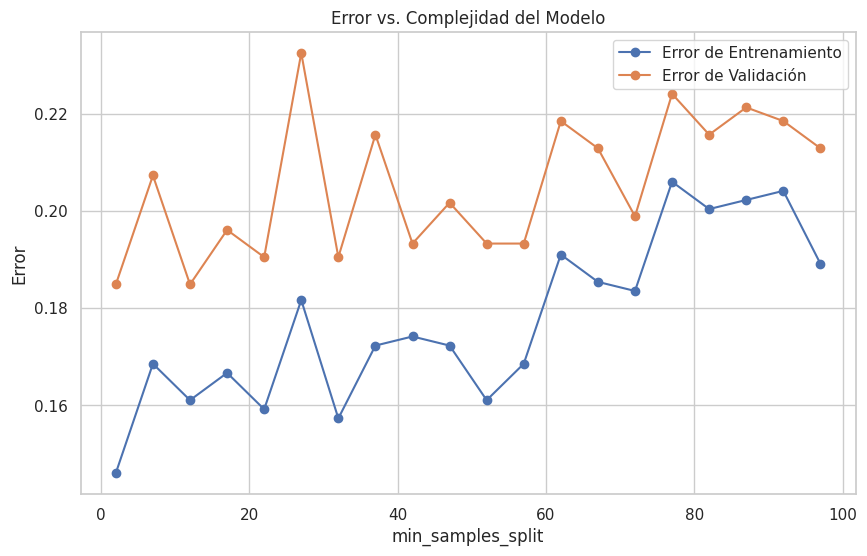

In [ ]:
# Define una lista de valores de min_samples_split que se desea probar
min_samples_split_values = range(2, 100, 5)

# Inicializa listas para almacenar los errores de entrenamiento y validación
train_errors = []
val_errors = []

# Itera a través de los valores de min_samples_split
for min_samples_split in min_samples_split_values:
    # Crea y entrena un modelo de Random Forest con el min_samples_split actual
    modeloRandomForest = RandomForestClassifier(criterion="gini", n_estimators=21,  max_depth=4, min_samples_split=min_samples_split)
    modeloRandomForest.fit(X_train, y_train)

    # Realiza predicciones en los conjuntos de entrenamiento y validación
    y_train_pred = modeloRandomForest.predict(X_train)
    y_val_pred = modeloRandomForest.predict(X_val)

    # Calcula el error de entrenamiento y validación
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    val_error = 1 - accuracy_score(y_val, y_val_pred)

    # Agrega los errores a las listas
    train_errors.append(train_error)
    val_errors.append(val_error)

# Crea la gráfica de error vs. complejidad del modelo
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_errors, label='Error de Entrenamiento', marker='o')
plt.plot(min_samples_split_values, val_errors, label='Error de Validación', marker='o')
plt.title('Error vs. Complejidad del Modelo')
plt.xlabel('min_samples_split')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


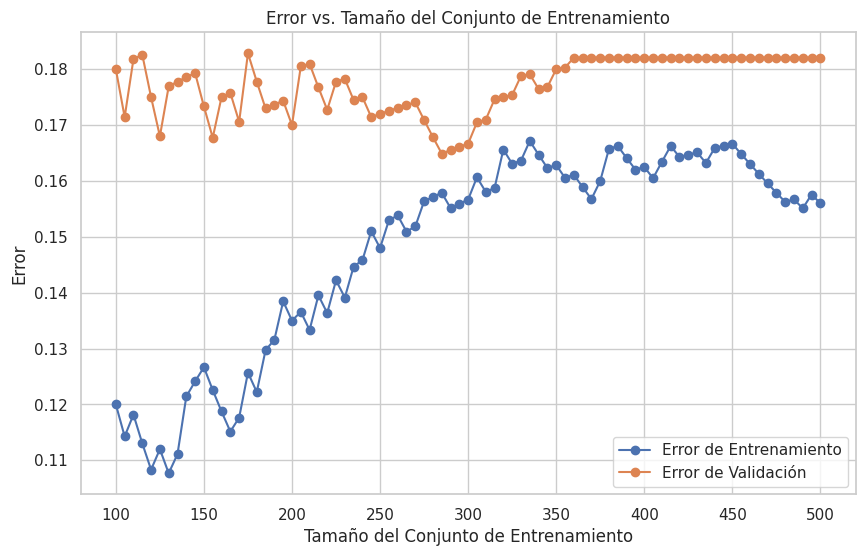

In [ ]:
# Modelo con ajuste de max_depth
tree = RandomForestClassifier(criterion="gini", n_estimators=21, max_depth=5, min_samples_split=22)
tree.fit(X_train, y_train)
error_modelo(tree)

#### Ajuste de parámetro min_impurity_decrease

Considerando estas observaciones se toma la decisión de ajustar el parámetro **min_impurity_decrease** para reducir el overfitting del modelo anterior. A continuación, se busca el la valor de **min_impurity_decrease** ideal para reducir el error de validación y entrenamiento.

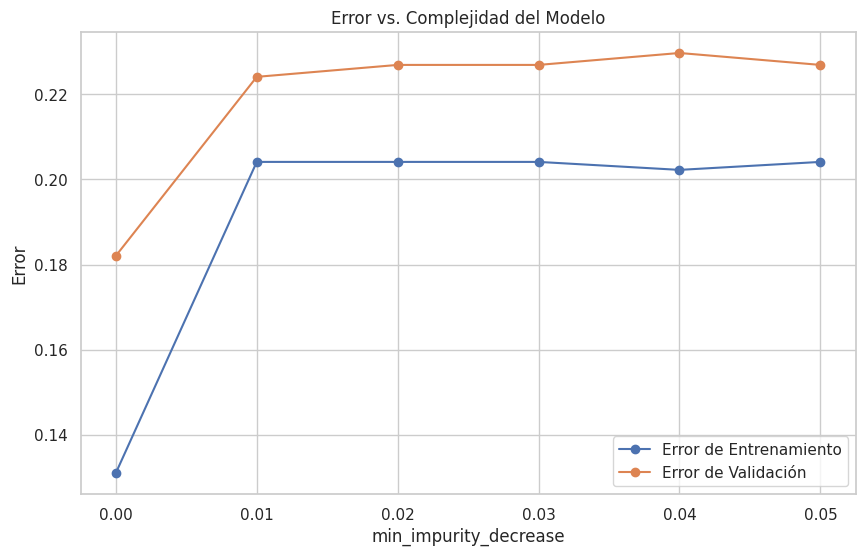

In [ ]:
# Define una lista de valores de min_impurity_decrease que se desea probar
min_impurity_decrease_values = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]

# Inicializa listas para almacenar los errores de entrenamiento y validación
train_errors = []
val_errors = []

# Itera a través de los valores de min_impurity_decrease
for min_impurity_decrease in min_impurity_decrease_values:
    # Crea y entrena un modelo de Random Forest con el min_impurity_decrease actual
    modeloRandomForest = RandomForestClassifier(criterion="gini", n_estimators=50, max_depth=15, min_samples_split=10, min_impurity_decrease=min_impurity_decrease)
    modeloRandomForest.fit(X_train, y_train)

    # Realiza predicciones en los conjuntos de entrenamiento y validación
    y_train_pred = modeloRandomForest.predict(X_train)
    y_val_pred = modeloRandomForest.predict(X_val)

    # Calcula el error de entrenamiento y validación
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    val_error = 1 - accuracy_score(y_val, y_val_pred)

    # Agrega los errores a las listas
    train_errors.append(train_error)
    val_errors.append(val_error)

# Crea la gráfica de error vs. complejidad del modelo
plt.figure(figsize=(10, 6))
plt.plot(min_impurity_decrease_values, train_errors, label='Error de Entrenamiento', marker='o')
plt.plot(min_impurity_decrease_values, val_errors, label='Error de Validación', marker='o')
plt.title('Error vs. Complejidad del Modelo')
plt.xlabel('min_impurity_decrease')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


#### Modelo final

Después de haber realizado los ajustes de hiper-parámetros pertinentes. Se llegó a la conclusión de que el mejor modelo para predecir si un pasajero sovrevivió o no es **modeloRandomForestConf = RandomForestClassifier(criterion="gini", n_estimators=21, max_depth=4, min_samples_split=22)**.

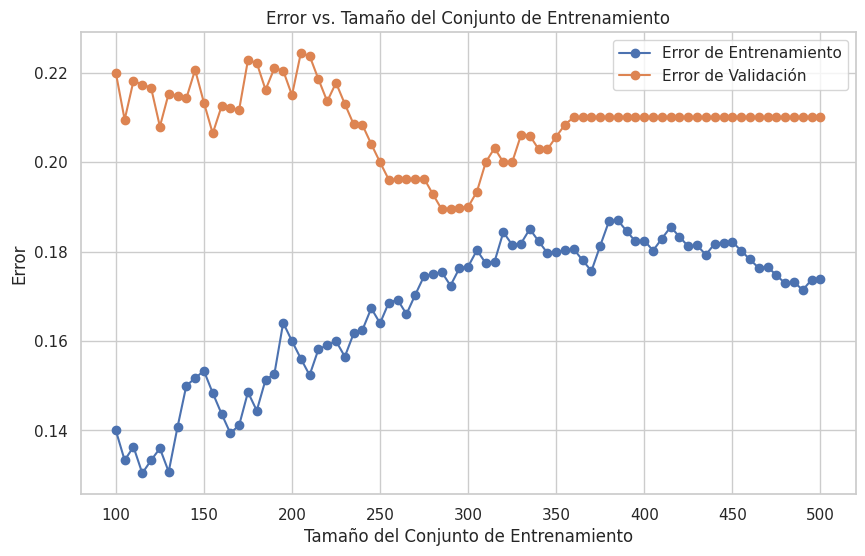

In [ ]:
# Modelo final
modeloRandomForestConf = RandomForestClassifier(criterion="gini", n_estimators=21, max_depth=4, min_samples_split=22)
modeloRandomForestConf.fit(X_train, y_train)
error_modelo(modeloRandomForestConf)

### Análisis de desempeño

#### Curva aprendizaje

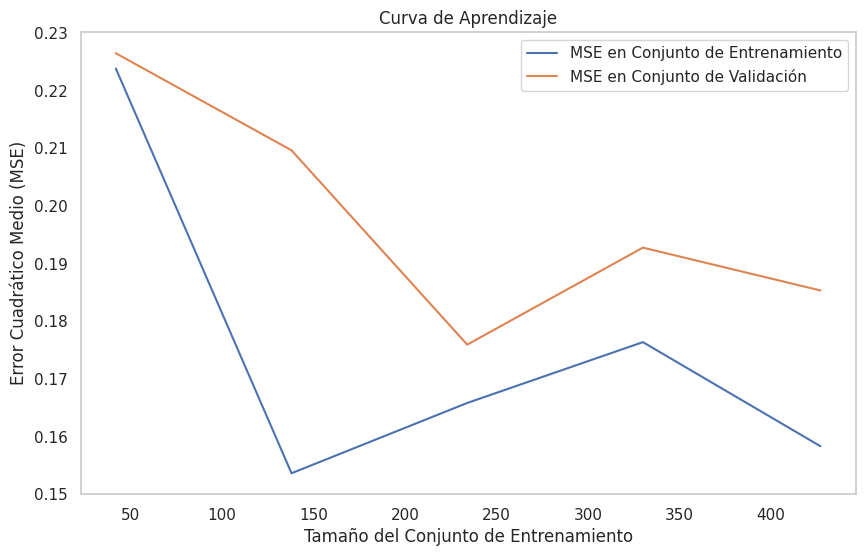

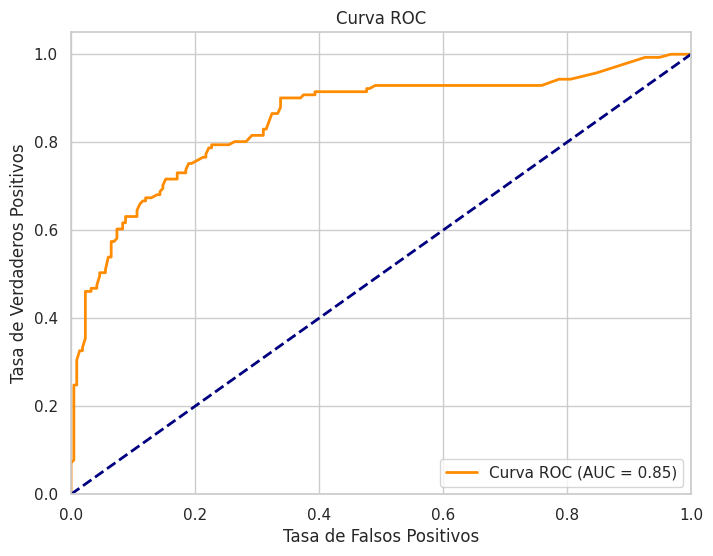

In [ ]:
# Visualizar la curva de aprendizaje (learning curve)
# Calcular el error cuadrático medio (MSE) en el conjunto de entrenamiento y validación
train_sizes, train_errors, val_errors = learning_curve(
    modeloRandomForestConf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir el error a positivo y tomar la media
train_errors = -np.mean(train_errors, axis=1)
val_errors = -np.mean(val_errors, axis=1)

# Visualizar la curva de aprendizaje del MSE
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='MSE en Conjunto de Entrenamiento')
plt.plot(train_sizes, val_errors, label='MSE en Conjunto de Validación')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.grid()
plt.show()

# Calcular y visualizar las curvas ROC en el conjunto de validación
y_val_prob = modeloRandomForestConf.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

#### Resultados del subconjunto de validacion

Métricas en el conjunto de prueba:
Accuracy score: 0.7899159663865546
Precision score: 0.7578125
Recall score: 0.6879432624113475
F1 score: 0.7211895910780669


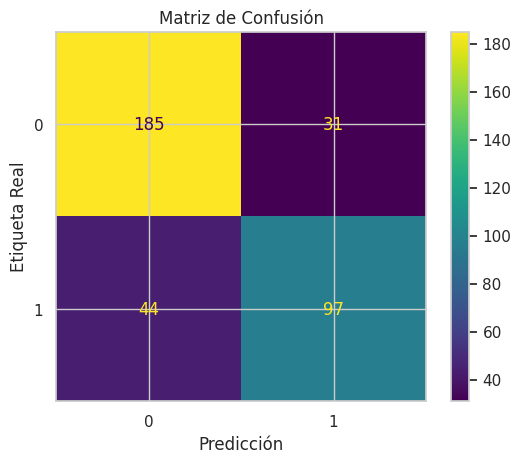

'decision_tree.pdf'

In [ ]:
y_pred = modeloRandomForestConf.predict(X_val)

# Calcular las métricas
print("Métricas en el conjunto de prueba:")
print("Accuracy score:", accuracy_score(y_val, y_pred))
print("Precision score:", precision_score(y_val, y_pred))
print("Recall score:", recall_score(y_val, y_pred))
print("F1 score:", f1_score(y_val, y_pred))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)

# Graficar la matriz de confusión como una imagen
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

# Visualizar un árbol del random forest
estimator = modeloRandomForestConf.estimators_[0]  # Seleccionar el primer árbol
myTreeData = export_graphviz(estimator, out_file=None,
                            feature_names= X_train.columns,
                            class_names=['Not Survived', 'Survived'],
                            filled=True, rounded=True, special_characters=True)

graphData = graphviz.Source(myTreeData)
graphData.view(filename='decision_tree')

####Guardamos las predicciones con los datos de prueba

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = modeloRandomForestConf.predict(X_val)

# Crear un DataFrame con las predicciones
results_df = pd.DataFrame({'Predicciones del Conjunto Prueba': y_pred_test})

# Visualizar el DataFrame con las predicciones
print(results_df)

     Predicciones del Conjunto Prueba
0                                   0
1                                   0
2                                   0
3                                   1
4                                   1
..                                ...
352                                 0
353                                 0
354                                 1
355                                 0
356                                 0

[357 rows x 1 columns]


#### Predicciones puntuales

In [ ]:
# Crear un DataFrame con datos de ejemplo
nuevos_datos_manual = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],
    'Age': [36],
    'IsAlone': [1],
    'Fare': [3],
    'Title': [1],
    'Embarked': [1]
})

# Asegurarse de que las columnas estén en el mismo orden que en el conjunto de entrenamiento
columnas_orden = X.columns  # Obtener las columnas en el mismo orden
nuevos_datos_manual = nuevos_datos_manual[columnas_orden]

# Utilizar el modelo ya entrenado para predecir los resultados para los nuevos datos ingresados manualmente
resultados_predichos_manual = modeloRandomForestConf.predict(nuevos_datos_manual)

# Imprimir los resultados de la prediccion
for resultado in resultados_predichos_manual:
    if resultado == 0:
        print("No sobrevivió")
    else:
        print("Sobrevivió")

Sobrevivió


In [ ]:
# Crear un DataFrame con datos de ejemplo
nuevos_datos_manual = pd.DataFrame({
    'Pclass': [2],
    'Sex': [1],
    'Age': [22],
    'IsAlone': [0],
    'Fare': [3],
    'Title': [1],
    'Embarked': [1]
})

# Asegurarse de que las columnas estén en el mismo orden que en el conjunto de entrenamiento
columnas_orden = X.columns  # Obtener las columnas en el mismo orden
nuevos_datos_manual = nuevos_datos_manual[columnas_orden]

# Utilizar el modelo ya entrenado para predecir los resultados para los nuevos datos ingresados manualmente
resultados_predichos_manual = modeloRandomForestConf.predict(nuevos_datos_manual)

# Imprimir los resultados de la prediccion
for resultado in resultados_predichos_manual:
    if resultado == 0:
        print("No sobrevivió")
    else:
        print("Sobrevivió")

No sobrevivió


In [ ]:
# Crear un DataFrame con datos de ejemplo
nuevos_datos_manual = pd.DataFrame({
    'Pclass': [2],
    'Sex': [1],
    'Age': [22],
    'IsAlone': [0],
    'Fare': [3],
    'Title': [2],
    'Embarked': [0]
})

# Asegurarse de que las columnas estén en el mismo orden que en el conjunto de entrenamiento
columnas_orden = X.columns  # Obtener las columnas en el mismo orden
nuevos_datos_manual = nuevos_datos_manual[columnas_orden]

# Utilizar el modelo ya entrenado para predecir los resultados para los nuevos datos ingresados manualmente
resultados_predichos_manual = modeloRandomForestConf.predict(nuevos_datos_manual)

# Imprimir los resultados de la prediccion
for resultado in resultados_predichos_manual:
    if resultado == 0:
        print("No sobrevivió")
    else:
        print("Sobrevivió")

Sobrevivió


#### Exportamos el modelo ya entrenado como archivo tipo pkl para entrega de API para interfaz

In [ ]:
joblib.dump(modeloRandomForestConf, 'random_forest_model.pkl')

['random_forest_model.pkl']